## OPTICS

### Ordering Points to Identify the Clustering Structure

Although DBSCAN can find clusters of comples and arbitrary shapes, there is still a need to manually define the parameter $\epsilon$ (the radius of the neighborhood) and $MinPts$ (number of points in order to be classified as a core object). This problem is not isolated in density-based algorithms. **It is quite a skill itself to define this parameters especially in real world, high-dimensional data sets, where algorithms are sensitive to the parameter values.**

* Sligthly different settings may lead to very difference clusterings of data. 
* Often, real world high dimensional data have very skewed distributions that their intrinsic clustering structure may not be well characterized by a single set of *global* density parameters.

Density-based clustering is monotonic with respect to the neighborhood threshold. With a fixed *MinPts* value and two threshold $\epsilon_1$ < $\epsilon_2$, a cluster *C* with respect to $\epsilon_1$ must be a subset of a cluster *C'* with respect to $\epsilon_2$.



<div>
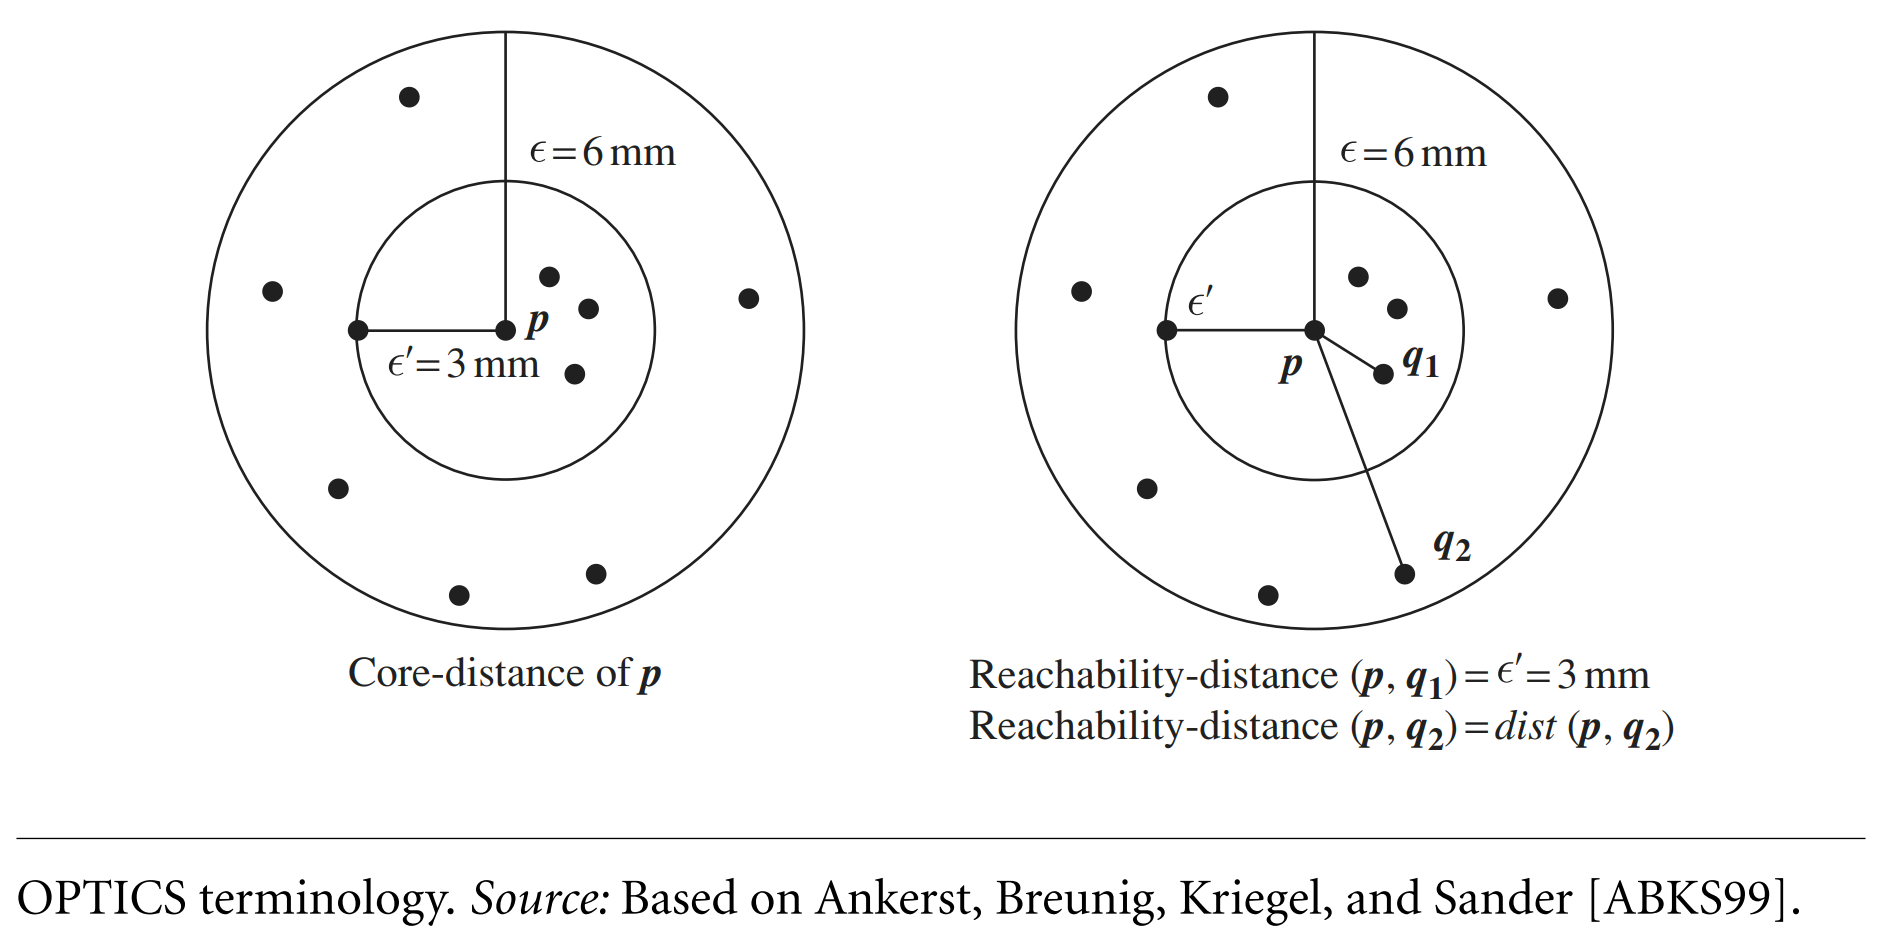
</div>



To overcome the difficulty in using 1 set of global parameters in clustering analysis, the method **OPTICS** was proposed. Instead of producing a dataset clustering, it outputs a **cluster ordering**. This is a linear list of all objects under analysis and represents the density-based clustering structure of the
data. Objects in a denser cluster are listed closer to each other in the cluster ordering.


This ordering is equivalent to density-based clustering obtained from a wide range of
parameter settings. Thus, OPTICS does not require the user to provide a specific density
threshold. The cluster ordering can be used to extract basic clustering information (e.g.,
cluster centers, or arbitrary-shaped clusters), derive the intrinsic clustering structure, as
well as provide a visualization of the clustering.




To construct the different clusterings simultaneously, the objects are processed in a
specific order. This order selects an object that is density-reachable with respect to the
lowest $\epsilon$ value so that clusters with higher density (lower $\epsilon$) will be finished first. Based
on this idea, OPTICS needs two important pieces of information per object:
* The **core-distance** of an object p is the smallest value $\epsilon$' such that the
$\epsilon$-neighborhood of p has at least $MinPts$ objects. That is, $\epsilon$' is the minimum distance threshold that makes $p$ a core object. If p is not a core object with respect to $\epsilon$
and $MinPts$, the core-distance of p is undefined.
* The **reachability-distance** to object $p$ from $q$ is the minimum radius value that makes
$p$ density-reachable from $q$. According to the definition of density-reachability, $q$
has to be a core object and $p$ must be in the neighborhood of q. Therefore, the
reachability-distance from $q$ to $p$ is max{core-distance(q), dist(p, q)}. If $q$ is not a
core object with respect to $\epsilon$ and $MinPts$, the reachability-distance to $p$ from $q$ is
undefined.


An object $p$ may be directly reachable from multiple core objects. Therefore, $p$
may have multiple reachability-distances with respect to different core objects. The
smallest reachability-distance of $p$ is of particular interest because it gives the shortest
path for which p is connected to a dense cluster.

<div>
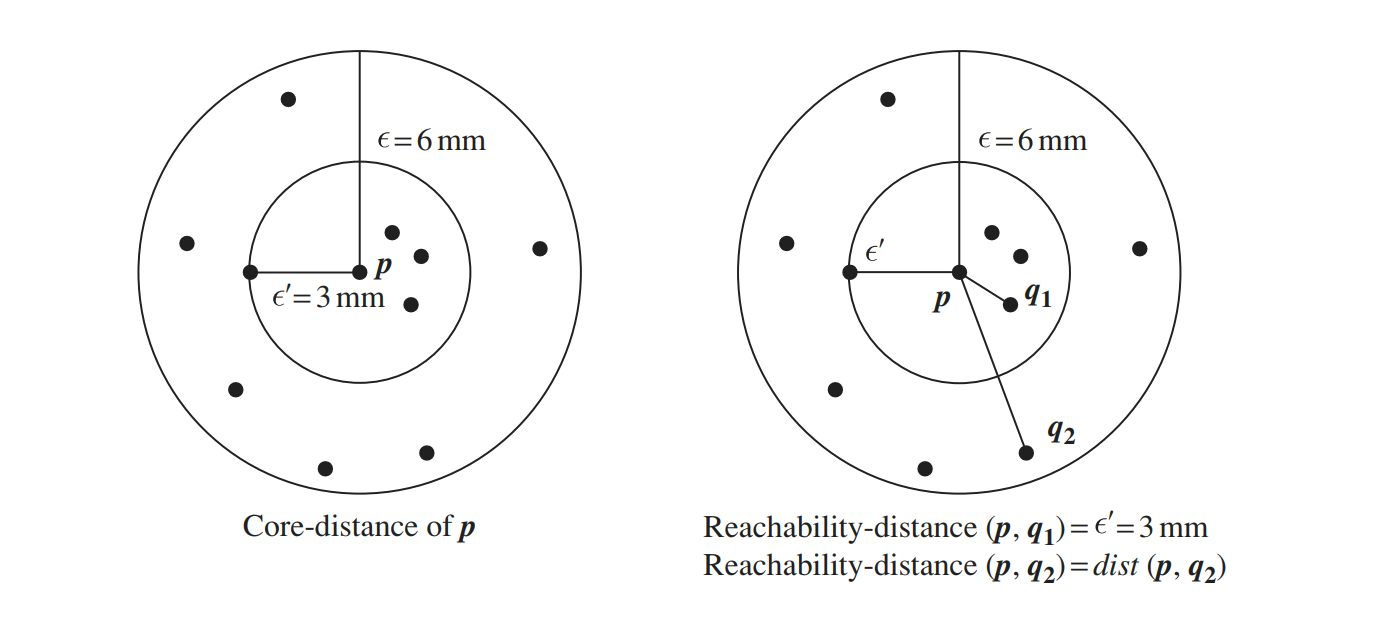
</div>

**Example:** Suppose that $\epsilon$= 6mm and $MinPts$ = 5. The core distance of $p$ is the distance, $\epsilon$', between $p$ and the fourth closest data object from $p$.
The **reachability-distance** of $q_1$ from $p$ is the core-distance of $p$ (i.e., $\epsilon$' = 3mm) because
this is greater than the Euclidean distance from p to q1. The reachability-distance of q2
with respect to p is the Euclidean distance from p to q2 because this is greater than the
core-distance of p





<div>
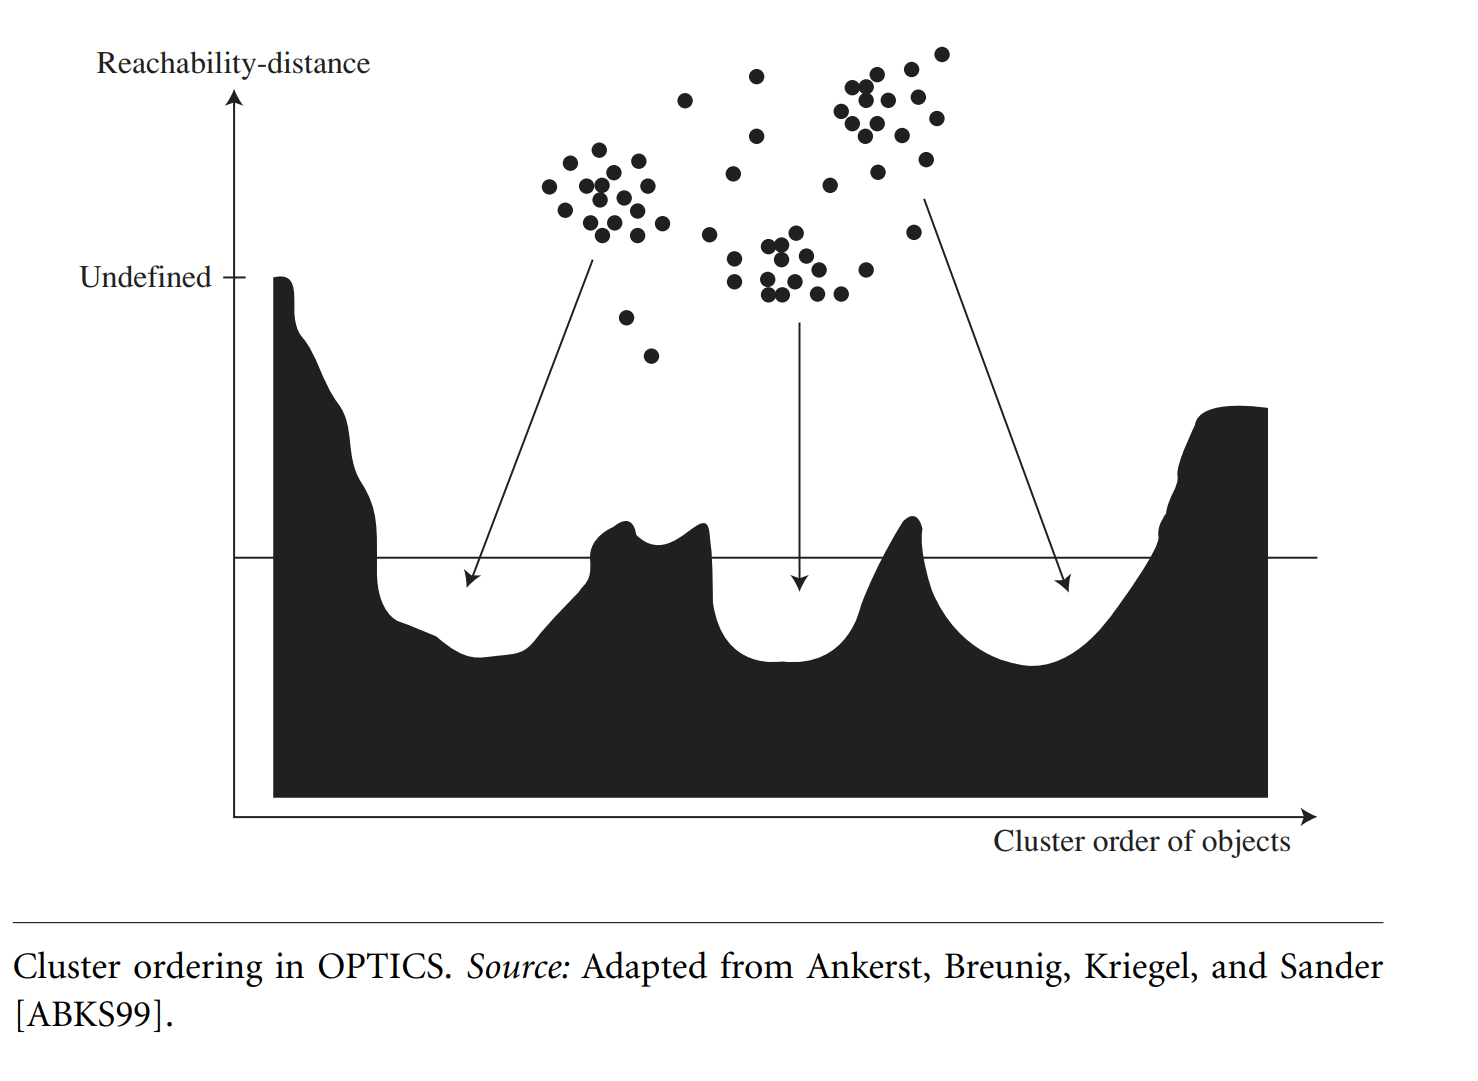
</div>


**STEPS:**
* OPTICS begins with an arbitrary object from the input database as the current
object, $p$. 
* It retrieves the $\epsilon$-neighborhood of $p$, determines the core-distance, and sets
the reachability-distance to undefined. The current object, $p$, is then written to output.
    * If p is not a core object, OPTICS simply moves on to the next object in the OrderSeeds
list (or the input database if OrderSeeds is empty). 
    * If p is a core object, then for each object, $q$, in the $\epsilon$-neighborhood of $p$, OPTICS updates its reachability-distance from $p$
and inserts $q$ into OrderSeeds if q has not yet been processed. 
* The iteration continues until the input is fully consumed and OrderSeeds is empty.



A data set’s cluster ordering can be represented graphically, which helps to visualize and understand the clustering structure in a data set. For example, Figure 10.17 is
the reachability plot for a simple 2-D data set, which presents a general overview of
how the data are structured and clustered. The data objects are plotted in the clustering order (horizontal axis) together with their respective reachability-distances (vertical
axis). The three Gaussian “bumps” in the plot reflect three clusters in the data set. Methods have also been developed for viewing clustering structures of high-dimensional data
at various levels of detail.
The structure of the OPTICS algorithm is very similar to that of DBSCAN. Consequently, the two algorithms have the same time complexity. The complexity is O.nlogn/
if a spatial index is used, and O.n2/ otherwise, where n is the number of objects

In [9]:
# Demo Sample from: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html

# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause


from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)


In [10]:
# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]




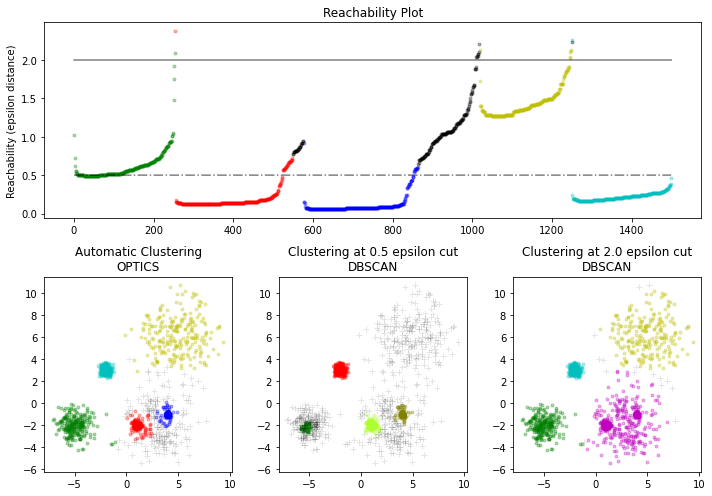

In [11]:
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])


# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()